In [23]:
import pandas as pd
import matplotlib.pyplot as plt



# Create the DataFrames
manual_stacked_data = pd.DataFrame({
    "Carbon Number": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "Aromatics": [0, 0, 0, 0, 0, 0, 0, 0.001524396949, 0.00005864025393, 0, 0, 0, 0, 0, 0],
    "Linear Alkanes": [0, 0, 0, 0, 0.9357490583, 0.2257996024, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Branched Alkanes": [0, 0, 0, 0, 4.928039771, 1.631019717, 0.6621199497, 0.1285317163, 0.0104698777, 0.0001546728551, 0, 0, 0, 0, 0],
    "Cycloalkanes": [0, 0, 0, 0, 1.441310671, 0.05867268022, 0.01647430267, 0, 0.00005109948726, 0.00004901627206, 0, 0, 0, 0, 0],
    "Alkenes/Alkynes": [0, 0, 0, 0, 0.09548579355, 0.8954805063, 0.09672423141, 0.01166989567, 0.001186856452, 0, 0, 0, 0, 0, 0],
    "Other": [0, 0, 0, 0, 0.00478001197, 0.0002441278605, 0, 0, 0.003781766277, 0, 0, 0, 0, 0, 0.0007377411918],
})

chromaquant_stacked_data = pd.DataFrame({
    "Carbon Number": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Linear Alkanes": [0, 0, 0, 0, 0.935723016, 0.2257933507, 0.07805097567, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Branched Alkanes": [0, 0, 0, 0, 4.606321769, 1.547747407, 0.8031592841, 0.2742526245, 0.01934925858, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Cycloalkanes": [0, 0, 0, 0, 1.58149752, 0, 0.06281160426, 0.0236934076, 0.00230422855, 0, 0, 0.00142434053, 0, 0, 0, 0, 0, 0, 0, 0],
    "Aromatics": [0, 0, 0, 0, 0, 0, 0, 0.001355919262, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Alkenes/Alkynes": [0, 0, 0, 0, 0, 0.9607747327, 0.5084376407, 0.1039636506, 0.009902797503, 0, 0, 0.0006000618405, 0, 0, 0, 0, 0, 0, 0, 0],
    "Other": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
})

# Define the order of the categories (keys)
categories = ["Aromatics", "Linear Alkanes", "Branched Alkanes", "Cycloalkanes", "Alkenes/Alkynes", "Other"]

# Set "Carbon Number" as the index for both DataFrames
manual_stacked_data.set_index("Carbon Number", inplace=True)
chromaquant_stacked_data.set_index("Carbon Number", inplace=True)



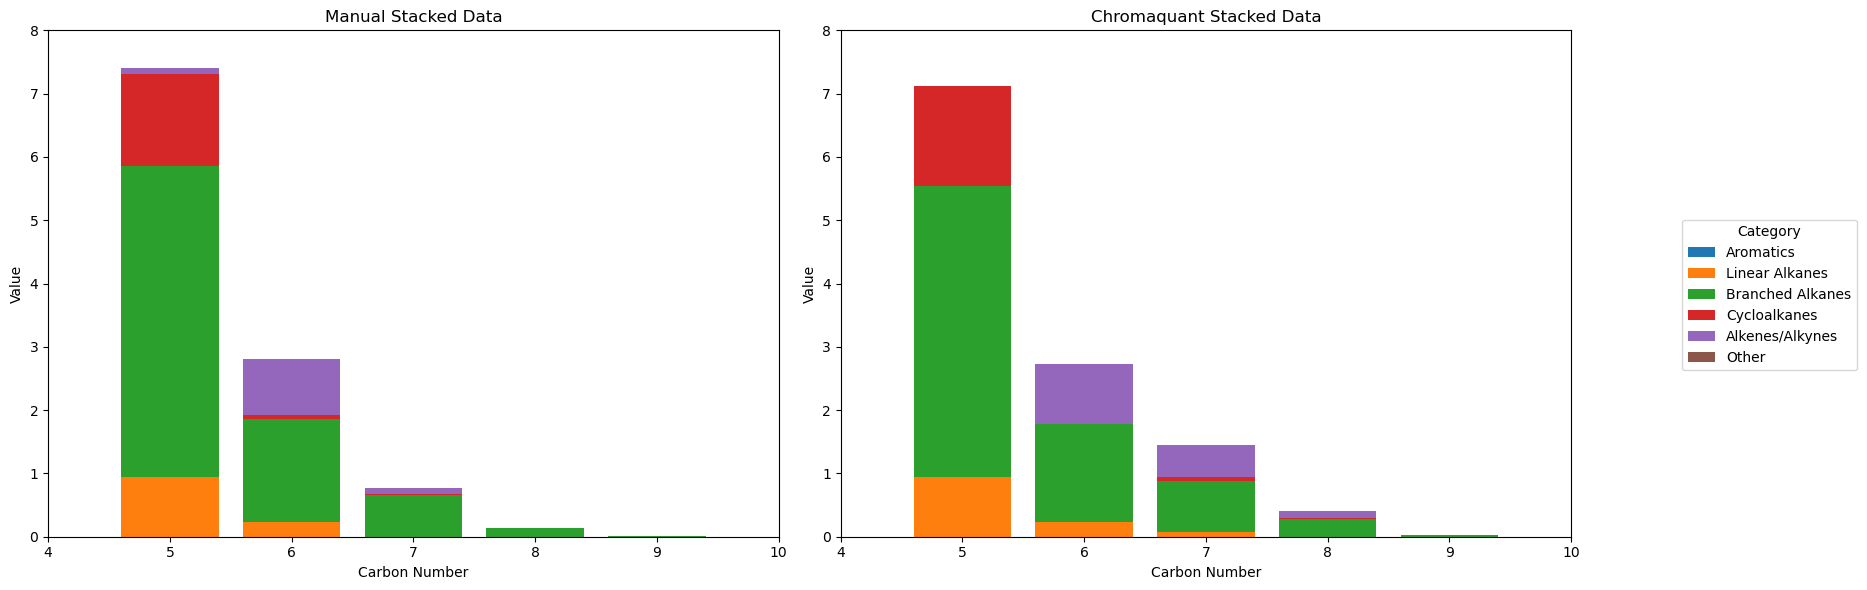

In [45]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Function to plot stacked bars for a given DataFrame
def plot_stacked_bars(ax, df, categories, title):
    bottom = np.zeros(len(df))  # Initialize the bottom of the bars
    for category in categories:
        ax.bar(df.index, df[category], bottom=bottom, label=category)
        bottom += df[category]  # Update the bottom for the next category
    
    #edit this to find the limits automatically...
    ax.set_xlim(4, 10)  
    ax.set_ylim(0, 8) 

    ax.set_title(title)
    ax.set_xlabel("Carbon Number")
    ax.set_ylabel("Value")

# Plot manual_stacked_data
plot_stacked_bars(axes[0], manual_stacked_data, categories, "Manual Stacked Data")

# Plot chromaquant_stacked_data
plot_stacked_bars(axes[1], chromaquant_stacked_data, categories, "Chromaquant Stacked Data")

# Create a single shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Category", bbox_to_anchor=(1.05, 0.5), loc="center left")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Manual Data Statistics:
        Aromatics  Linear Alkanes  Branched Alkanes  Cycloalkanes  \
count  15.000000       15.000000         15.000000     15.000000   
mean    0.000106        0.077437          0.490689      0.101104   
std     0.000393        0.244462          1.303545      0.371076   
min     0.000000        0.000000          0.000000      0.000000   
25%     0.000000        0.000000          0.000000      0.000000   
50%     0.000000        0.000000          0.000000      0.000000   
75%     0.000000        0.000000          0.069501      0.000050   
max     0.001524        0.935749          4.928040      1.441311   

       Alkenes/Alkynes      Other  
count        15.000000  15.000000  
mean          0.073370   0.000636  
std           0.229868   0.001504  
min           0.000000   0.000000  
25%           0.000000   0.000000  
50%           0.000000   0.000000  
75%           0.006428   0.000122  
max           0.895481   0.004780  
Chromaquant Data Statistics:
        L

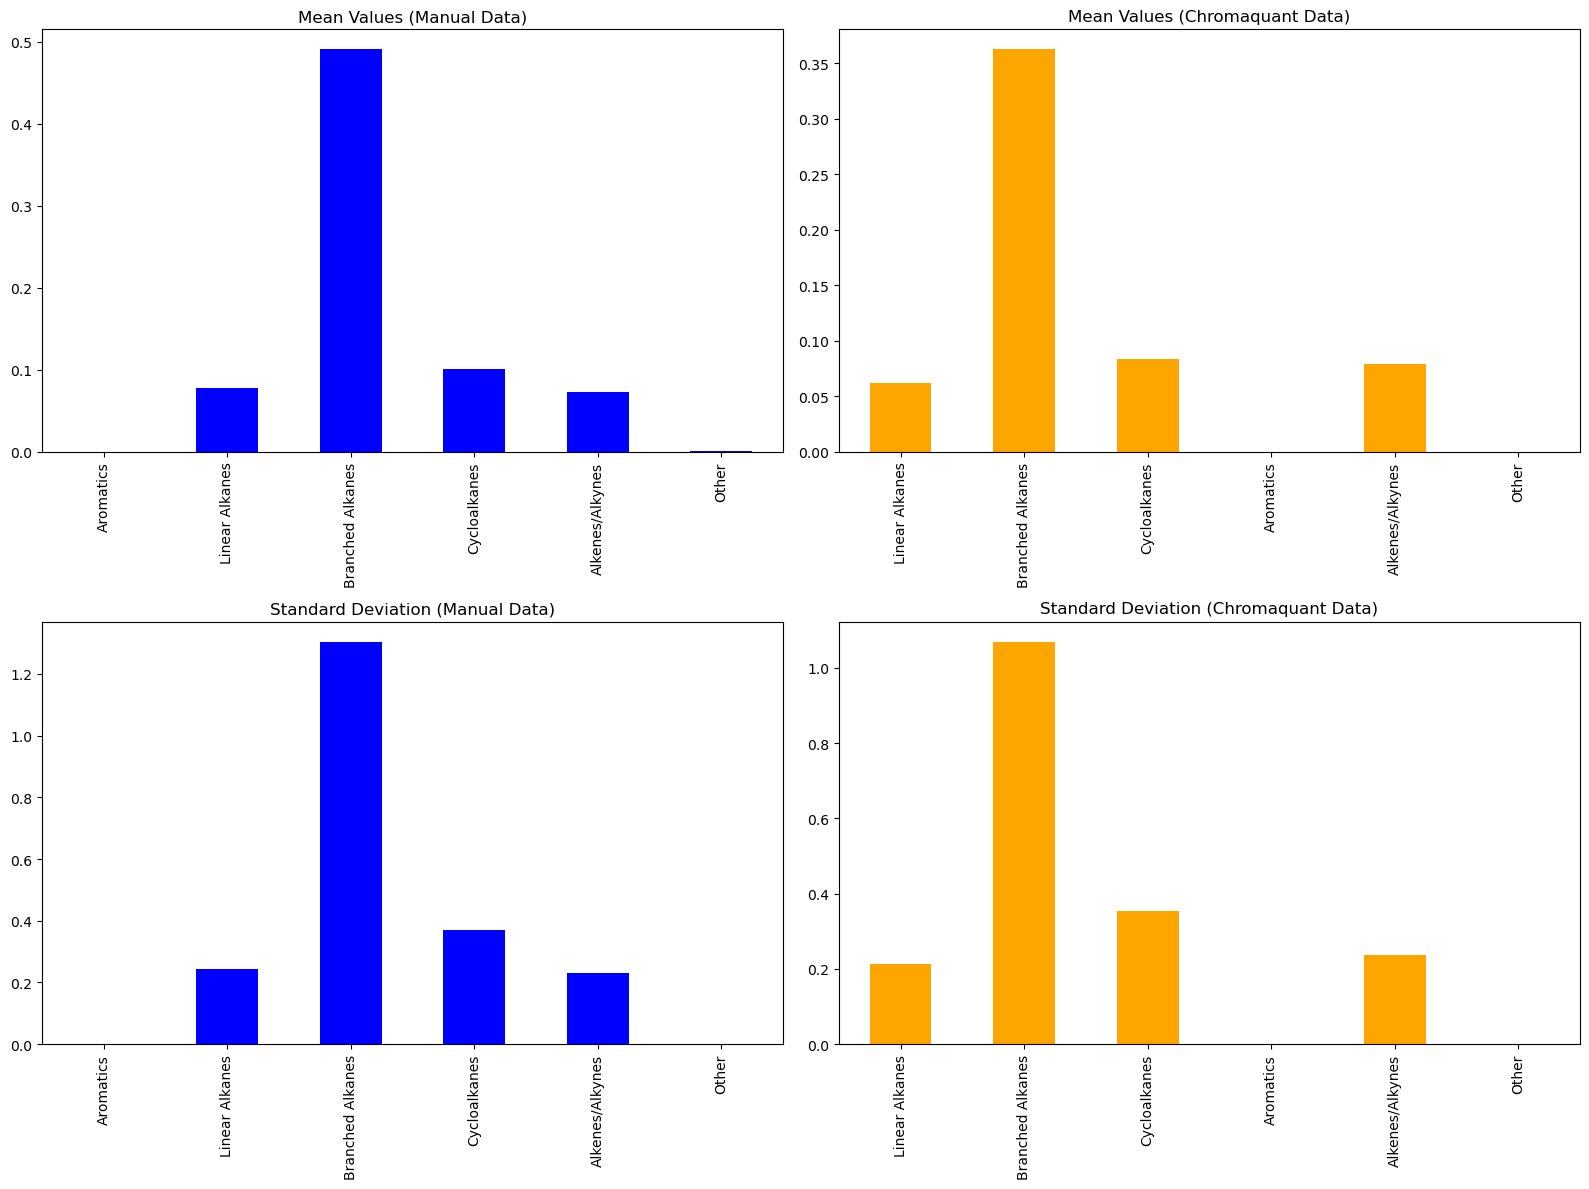

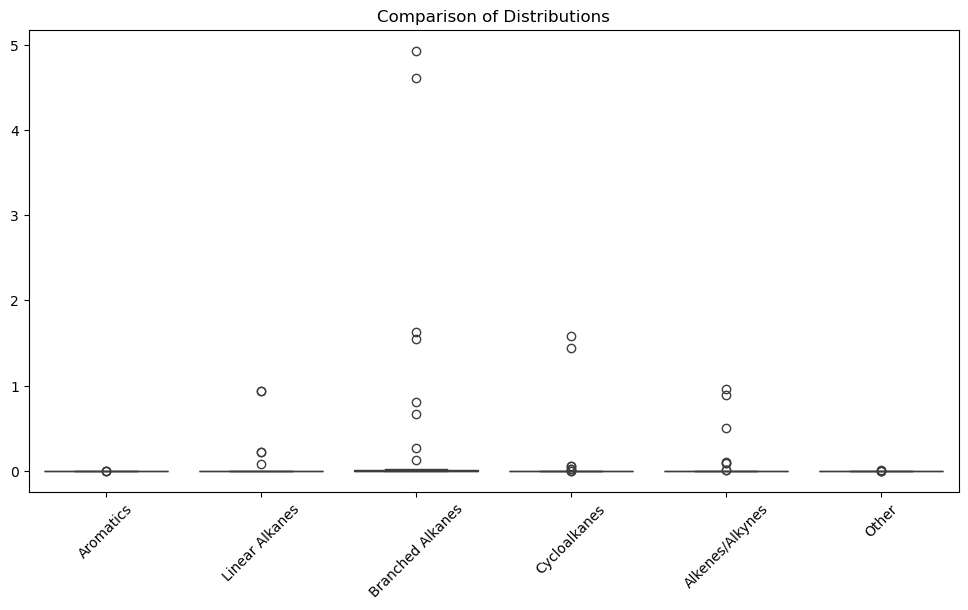

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute descriptive statistics for both DataFrames
manual_stats = manual_stacked_data.describe()
chromaquant_stats = chromaquant_stacked_data.describe()

# Print the statistics
print("Manual Data Statistics:\n", manual_stats)
print("Chromaquant Data Statistics:\n", chromaquant_stats)

# Visualize the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot mean values
manual_stats.loc["mean"].plot(kind="bar", ax=axes[0, 0], color="blue", title="Mean Values (Manual Data)")
chromaquant_stats.loc["mean"].plot(kind="bar", ax=axes[0, 1], color="orange", title="Mean Values (Chromaquant Data)")

# Plot standard deviation
manual_stats.loc["std"].plot(kind="bar", ax=axes[1, 0], color="blue", title="Standard Deviation (Manual Data)")
chromaquant_stats.loc["std"].plot(kind="bar", ax=axes[1, 1], color="orange", title="Standard Deviation (Chromaquant Data)")

# Adjust layout
plt.tight_layout()
plt.show()

# Boxplot to compare distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.concat([manual_stacked_data, chromaquant_stacked_data], keys=["Manual", "Chromaquant"]))
plt.title("Comparison of Distributions")
plt.xticks(rotation=45)
plt.show()